# Analisis del desempeño de entregas

**Objetivo:**
Analizar datos históricos de entregas para identificar:

- Tiempos promedio de entrega.
- Retrasos frecuentes por región, conductor o tipo de paquete.
- Cumplimiento de tiempos de entrega en comparación con los objetivos establecidos.

## Pasos del Proyecto
### Recolección de Datos:

Fuente: Datos históricos de entregas
Campos necesarios:
ID de la entrega
Fecha y hora de inicio
Fecha y hora de entrega
Estado (a tiempo, retrasado, cancelado)
Región/zona
Conductor
Distancia de entrega
Tipo de paquete

### Preparación de Datos:

Limpiar datos faltantes o erróneos.
Duración de entrega.


### Análisis Exploratorio de Datos (EDA):

Calcular métricas clave:
- Tiempo promedio de entrega.
- Porcentaje de entregas a tiempo.
- Porcentaje de entregas retrasadas por región o conductor.

Visualizaciones:
- Gráficos de barras para regiones con más retrasos.
- Histogramas de duración de entregas.
- Líneas de tiempo para observar tendencias mensuales.

### Detección de Problemas:

- Identificar regiones, conductores o condiciones que causan más retrasos.
Evaluar si hay patrones en días específicos (por ejemplo, fines de semana o festivos).

### Generación de Reportes:

- Crear reportes claros con gráficos y tablas.
- Resaltar las áreas con mejor y peor desempeño.

### Conclusiones



## Preparación de datos

In [2]:
# Importación de bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# Se carga dataframe
deliveries = pd.read_csv('/content/drive/MyDrive/desempeno_entregas_ficticio.csv')

In [4]:
# Se visualiza dataframe
print(deliveries.head(5))

  ID_Entrega Fecha_Inicio  Duración_Estimada_Horas  Duración_Real_Horas  \
0   ENT-0001   2024-12-07                       45                   49   
1   ENT-0002   2024-12-20                       29                   24   
2   ENT-0003   2024-12-29                       38                   36   
3   ENT-0004   2024-12-15                       28                   28   
4   ENT-0005   2024-12-11                       27                   10   

   Región Conductor     Estado          Fecha_Final  
0   Norte    Cond-3  Retrasado  2024-12-09 01:00:00  
1     Sur    Cond-9   A tiempo  2024-12-21 00:00:00  
2  Centro   Cond-10   A tiempo  2024-12-30 12:00:00  
3   Norte   Cond-14   A tiempo  2024-12-17 01:00:00  
4   Norte   Cond-11   A tiempo  2024-12-11 10:00:00  


In [5]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID_Entrega               500 non-null    object
 1   Fecha_Inicio             500 non-null    object
 2   Duración_Estimada_Horas  500 non-null    int64 
 3   Duración_Real_Horas      500 non-null    int64 
 4   Región                   500 non-null    object
 5   Conductor                500 non-null    object
 6   Estado                   500 non-null    object
 7   Fecha_Final              500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Se cambiaran los Dtype para Fecha_inicio, fecha_final y se transformaran por su respectivo formato de fecha.

In [6]:
# Se formatean las columnas que contienen fechas
deliveries['Fecha_Inicio'] = pd.to_datetime(deliveries['Fecha_Inicio'])
deliveries['Fecha_Final'] = pd.to_datetime(deliveries['Fecha_Final'])

In [7]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID_Entrega               500 non-null    object        
 1   Fecha_Inicio             500 non-null    datetime64[ns]
 2   Duración_Estimada_Horas  500 non-null    int64         
 3   Duración_Real_Horas      500 non-null    int64         
 4   Región                   500 non-null    object        
 5   Conductor                500 non-null    object        
 6   Estado                   500 non-null    object        
 7   Fecha_Final              500 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [8]:
#Verificamos si existen duplicados
deliveries.duplicated().sum()

0

In [9]:
#Verificamos si existen valores ausentes
deliveries.isnull().sum()

,0
ID_Entrega,0
Fecha_Inicio,0
Duración_Estimada_Horas,0
Duración_Real_Horas,0
Región,0
Conductor,0
Estado,0
Fecha_Final,0


No existen ni valores duplicados ni valores nulos, por lo tanto podemos trabajar con los datos

In [10]:
print(deliveries)

    ID_Entrega Fecha_Inicio  Duración_Estimada_Horas  Duración_Real_Horas  \
0     ENT-0001   2024-12-07                       45                   49   
1     ENT-0002   2024-12-20                       29                   24   
2     ENT-0003   2024-12-29                       38                   36   
3     ENT-0004   2024-12-15                       28                   28   
4     ENT-0005   2024-12-11                       27                   10   
..         ...          ...                      ...                  ...   
495   ENT-0496   2024-12-11                       13                   13   
496   ENT-0497   2024-12-22                        6                   52   
497   ENT-0498   2024-12-16                       44                   53   
498   ENT-0499   2024-12-07                       21                   19   
499   ENT-0500   2024-12-29                       39                   16   

     Región Conductor     Estado         Fecha_Final  
0     Norte    Cond-

In [11]:
#Creamos la columna duración de entrega
deliveries['Duracion_Entrega'] = deliveries['Fecha_Final'] - deliveries['Fecha_Inicio']

<Axes: xlabel='Duracion_Entrega'>

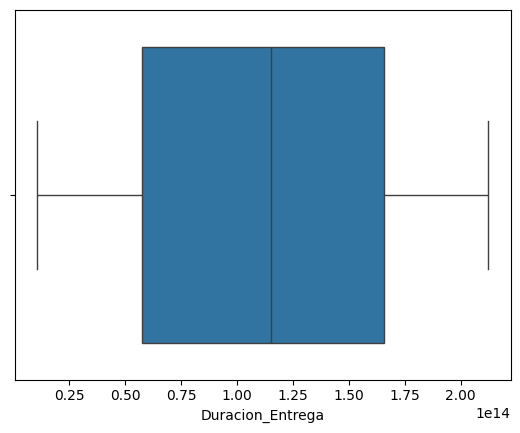

In [12]:
sns.boxplot(x=deliveries['Duracion_Entrega'])

In [13]:
deliveries['Duracion_Entrega'].describe()

,Duracion_Entrega
count,500
mean,1 days 07:12:14.400000
std,0 days 16:47:11.332838331
min,0 days 03:00:00
25%,0 days 16:00:00
50%,1 days 08:00:00
75%,1 days 22:00:00
max,2 days 11:00:00


No parece que tengamos datos atipicos y nuestros datos se encuentran dentro del rango de 1 día de entrega con un par de horas.

## Analisis de Datos Exploratorio

In [14]:
#Tiempo promedio de entrega
deliveries['Duracion_Entrega'].mean()

Timedelta('1 days 07:12:14.400000')

Tenemos tiempo promedio de entrega de 1 día con 7 horas, De acuerdo a la información del sitio de DHL, una de las empresas de logistica mas grandes, sus entregas locales son programadas para 1 - 2 días habiles, por lo que podemos concluir que nuestro tiempo se encuentra dentro de lo esperado.

In [15]:
#Porcentaje de entregasa tiempo
deliveries['Estado'].value_counts(normalize=True)

,proportion
Estado,
A tiempo,0.692
Retrasado,0.250
Cancelado,0.058


Contamos con un porcentaje de entrega a tiempo del 69.2%, mientras que el 25% se encuentra retrasado. En terminos generales, se espera que el porcentaje de retraso se encuentre entre el 5% - 15% en condiciones normales, en temporadas como navidad, el cual es nuestro caso, este porcentaje puede llegar hasta un 25%. De cualquier forma vamos a analizar por región y por día para estar seguros de lo que sucedio.


In [16]:
#Porcentaje de entregas retrasadas por región
deliveries.groupby('Región')['Estado'].value_counts(normalize=True)

Región  Estado   
Centro  A tiempo     0.725490
        Retrasado    0.225490
        Cancelado    0.049020
Este    A tiempo     0.730000
        Retrasado    0.210000
        Cancelado    0.060000
Norte   A tiempo     0.721154
        Retrasado    0.240385
        Cancelado    0.038462
Oeste   A tiempo     0.602273
        Retrasado    0.284091
        Cancelado    0.113636
Sur     A tiempo     0.669811
        Retrasado    0.292453
        Cancelado    0.037736
Name: proportion, dtype: float64

Como podemos observar en todas las regiones aún contamos con porcentajes por encima del 21% de retrasos.

<Axes: xlabel='Fecha_Inicio'>

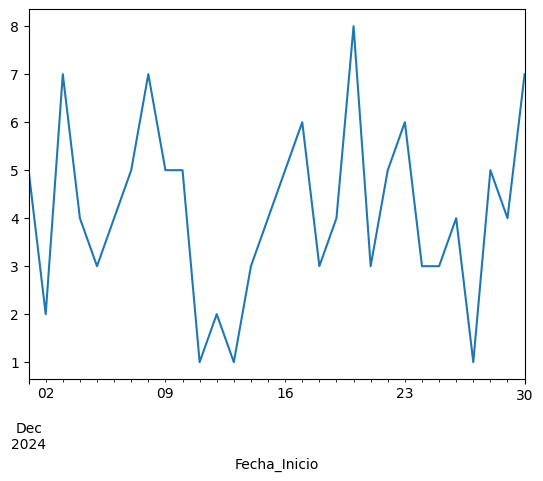

In [32]:
# Grafico de lineas sobre las entregas de tipo retrasadas diarias
deliveries[deliveries['Estado'] == 'Retrasado'].groupby('Fecha_Inicio').size().plot(kind='line')

<Axes: xlabel='Fecha_Inicio'>

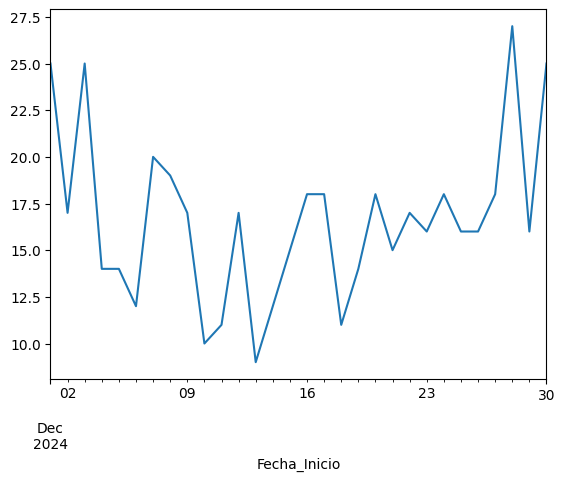

In [31]:
# grafico de cantidad de entregas por día
deliveries['Fecha_Inicio'].value_counts().sort_index().plot(kind='line')

Comparando ambos gráficos el primero con los retrasos durante el mes y las entregas del mes podemos concluir que el porcentaje de retraso se debe a una saturación del servicio durante el final y el inicio del mes. Que en este caso puede deberse a los dos eventos estacionales de Black Friday y las compras de Navidad.
- Se requiere analizar otros meses para asegurar que la demanda al inicio y final del mes, no se debe a un efecto de estacionalidad.
- Se recomienda contratar personal de temporada para cubrir la demanda.
- Usar servicios de terceros para solventar nuestra demanda en el servicio de ultima milla.

### Visualizaciones


<Axes: xlabel='Región', ylabel='count'>

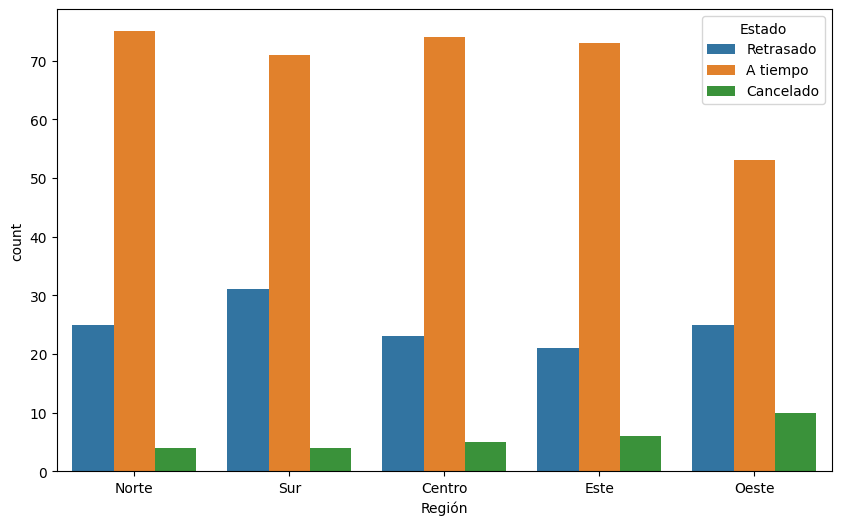

In [17]:
# Gráficos de barras para regiones con más retrasos.
plt.figure(figsize=(10, 6))
sns.countplot(data=deliveries, x='Región', hue='Estado')

In [18]:
deliveries['Duracion_Entrega']

,Duracion_Entrega
0,2 days 01:00:00
1,1 days 00:00:00
2,1 days 12:00:00
3,2 days 01:00:00
4,0 days 10:00:00
...,...
495,0 days 19:00:00
496,2 days 04:00:00
497,2 days 05:00:00
498,0 days 19:00:00


<Axes: xlabel='Duración_Real_Horas', ylabel='Count'>

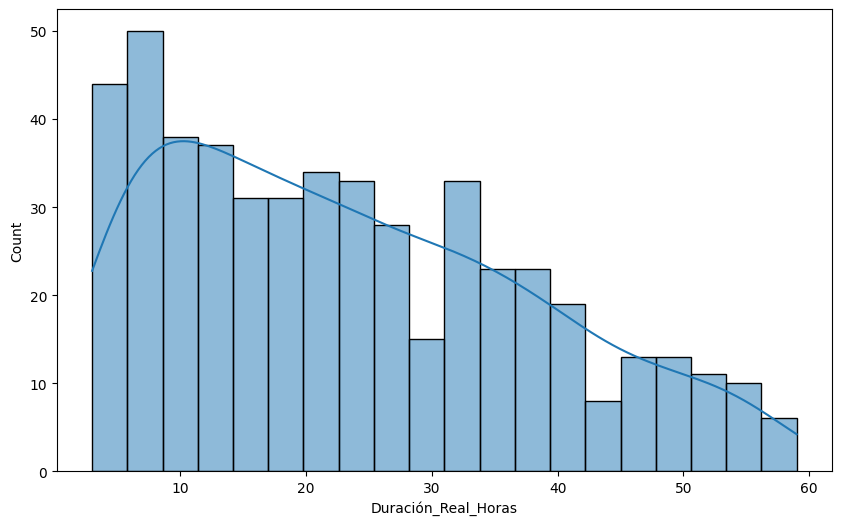

In [19]:
# Histogramas de duración de entregas.
plt.figure(figsize=(10, 6))
sns.histplot(data=deliveries, x='Duración_Real_Horas', bins=20, kde=True)



<Axes: xlabel='Fecha_Inicio'>

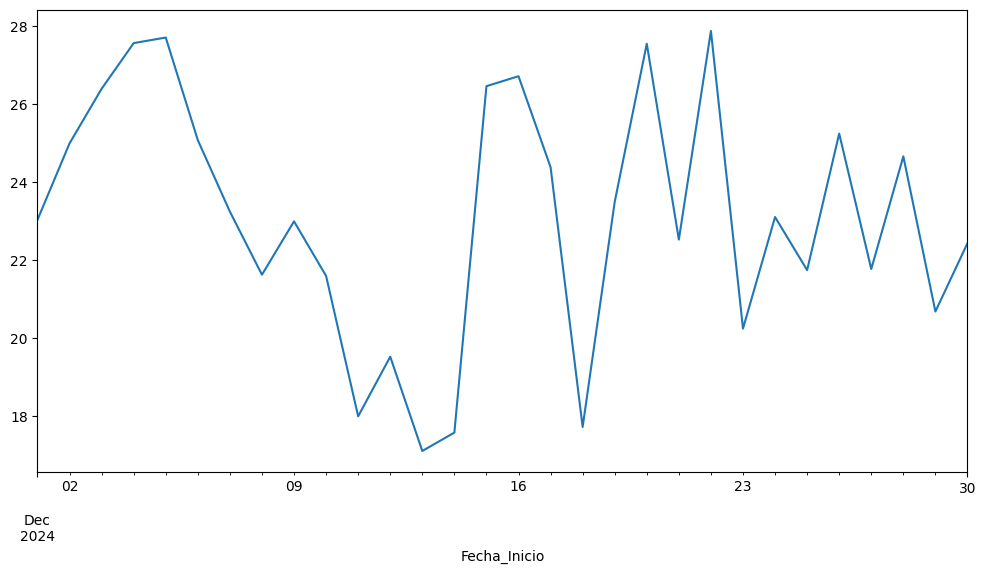

In [20]:
#Líneas de tiempo para observar tendencias diarias.
plt.figure(figsize=(12, 6))
deliveries.set_index('Fecha_Inicio').resample('D')['Duración_Real_Horas'].mean().plot()

Podemos observar lo siguiente:
- Los valles representan los días con menos entregas y rutas más eficientes
- Los picos son los días de mayor demanda
Como podemos observar los valles se concentran en los días miercoles para el dia 11 y 18.
Hay fluctuaciones significativas durante el mes, disminuyendo durante los ultimos días del mes.
- Hay una epoca estacional correspondiente a la navidad donde el número de entregas parece estabilizarse.

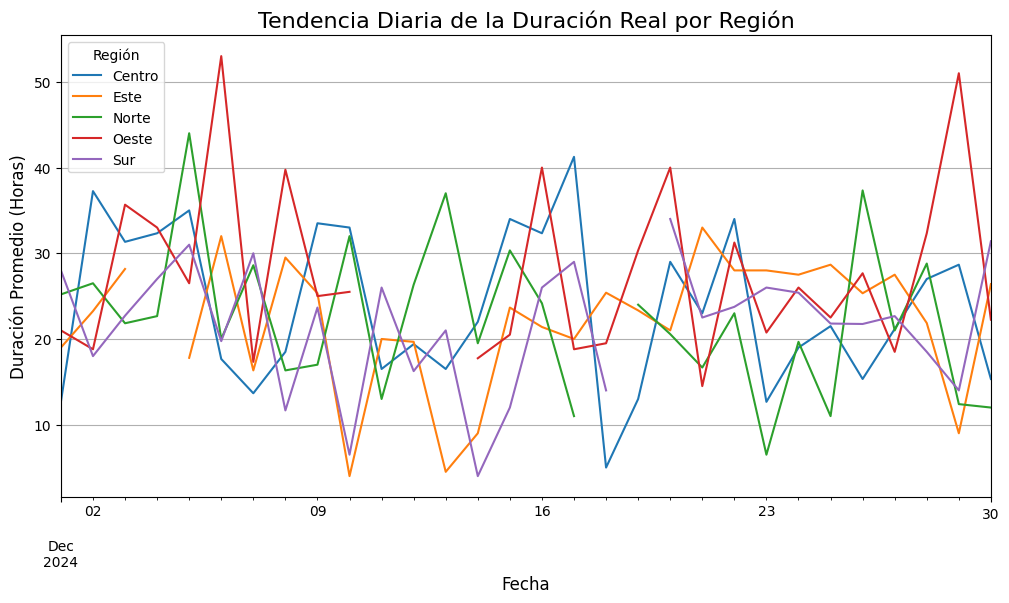

In [21]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 6))

# Agrupar por región y trazar una línea para cada una
for region, group in deliveries.groupby('Región'):
    group.set_index('Fecha_Inicio').resample('D')['Duración_Real_Horas'].mean().plot(label=region)

# Agregar leyenda, título y etiquetas
plt.legend(title="Región")
plt.title('Tendencia Diaria de la Duración Real por Región', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Duración Promedio (Horas)', fontsize=12)
plt.grid(True)

# Mostrar el gráfico
plt.show()

In [22]:
# Número de entregas por región
deliveries['Región'].value_counts()

,count
Región,
Sur,106
Norte,104
Centro,102
Este,100
Oeste,88


Podemos observar que la region sur apesar de ser la que tiene mayor numero de entregas, es la más eficiente. Mientras que la Oeste tenemos un menor número de entregas pero el tiempo de duración es mucho mayor.

In [25]:
# Número de conductores por región
deliveries.groupby('Región')['Conductor'].nunique()

,Conductor
Región,
Centro,19
Este,19
Norte,19
Oeste,19
Sur,19


Con esta información podemos concluir que la región Oeste es la región menos eficiente ya que todas las regiones cuentan con la misma cantidad de conductores.
Recomendaciones:
- Verificar el trazado de rutas de la región oeste.
- Revisar la cantidad de km recorridos de cada viaje, ya que es posible que ciertas regiones sean más grandes que otras o las vialidades hagan que el tiempo de entrega sea mayor.
- Capacitar al personal que genera las rutas.
- Contratar más conductores en esta zona.

## Conclusiones

Logramos observar que el porcentaje de retraso de los pedidos se encuentra en el 25% lo cual esta en el limite de lo aceptable durante las temporadas altas como lo es navidad. A su vez, tenemos el evento de Black friday del mes de noviembre y la navidad que son eventos importantes para envios, por lo que eso explica nuestros aumentos durante el inicio y el final del mes.

Por otro lado, analizando cada región, se logro observar que la región sur es la más eficiente aun con un mayor número de pedidos a comparación de la región oeste que tiene el menor número de entregas y el tiempo medio de duración más alto, convirtienedose en la región menos eficiente.

Recomendaciones:
Para el primer caso:
- Se tiene un porcentaje de retraso considerable, por lo que se sugiere contratar personal temporal para la temporada de diciembre. Usar servicios de terceros para entregas más lejanas.
Para el segundo caso:
- Capacitar al personal que traza las rutas.
- Contratar más conductores para las regiones más grandes.
- Generar indicadores como km recorrido por entrega realizada, con el fin de evaluar las rutas y la eficiencia del conductor.